## Actividad 2. Programa con IF para la limpieza de datos
#### Mario Guerra Gualy

### Cargue de Librerias

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', None)

### Cargue archivo

In [88]:
df_titanic=pd.read_csv("ARCHIVOS/titanic.csv", sep=",")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Detalle de variables en el conjunto de datos

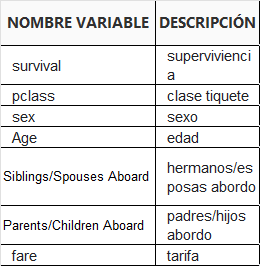tarifa


Podemos observar que este conjunto de datos representa los datos de pasajeros que se encontraban en el titanic, donde se muestra si sobrevivio o no al desastre, en que clase viajaba, su edad, sexo y datos de numeros de familiares a bordo y la tarifa pagada. Pasaremos los nombresd e las columnas a español

In [89]:
df_titanic.columns=['supervivencia','clase_tiquete','nombre','sexo','edad','hermanos_esposas_abordo','padres_hijos_abordo','tarifa']

In [90]:
df_titanic.shape

(887, 8)

In [91]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   supervivencia            887 non-null    int64  
 1   clase_tiquete            887 non-null    int64  
 2   nombre                   887 non-null    object 
 3   sexo                     887 non-null    object 
 4   edad                     887 non-null    float64
 5   hermanos_esposas_abordo  887 non-null    int64  
 6   padres_hijos_abordo      887 non-null    int64  
 7   tarifa                   887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


El informe resumen nos muestra que son 866 registros con un total de 8 columnas. Observamos que no hay que presenten valores nulos, entremos a analizar cada una de ellas

#### Columna supervivencia

In [92]:
df_titanic['supervivencia'].nunique(dropna=False)

2

Se encuentran 2 tipos de supervivencia, los cuales son:

In [93]:
df_titanic['supervivencia'].unique()

array([0, 1], dtype=int64)

El conteo de registros por clase de trabajo es el siguiente:

In [94]:
df_titanic['supervivencia'].value_counts(dropna=False)

supervivencia
0    545
1    342
Name: count, dtype: int64

Observamos que gran parte de poblacion no sobrevivio al desastre ya que representan a 545 pasajeros que perdiron su vida, vs 342 que sobrevivieron

#### Columna clase_tiquete

In [95]:
df_titanic['clase_tiquete'].nunique(dropna=False)

3

Se evidencia 3 tipos de clase_tiquete, los cuales son:

In [96]:
df_titanic['clase_tiquete'].unique()

array([3, 1, 2], dtype=int64)

El conteo de registros por ocuapcion es el siguiente:

In [97]:
df_titanic['clase_tiquete'].value_counts(dropna=False)

clase_tiquete
3    487
1    216
2    184
Name: count, dtype: int64

Se observa que la tercera clase es la de mayor población, seguida de la priemra clase y por ultimo segunda clase. veamos cuantas personas se salvaron o no por cada clase

In [98]:
df_titanic_no_sobre=df_titanic[df_titanic['supervivencia']==0]
df_titanic_si_sobre=df_titanic[df_titanic['supervivencia']==1]

In [99]:
df_titanic_no_sobre.shape

(545, 8)

In [100]:
df_titanic_no_sobre['clase_tiquete'].value_counts(dropna=False)

clase_tiquete
3    368
2     97
1     80
Name: count, dtype: int64

In [101]:
df_titanic_si_sobre['clase_tiquete'].value_counts(dropna=False)

clase_tiquete
1    136
3    119
2     87
Name: count, dtype: int64

Como se ve pertenecer a una clase si beneficiaba la probabilidad de salvarse, ya que de primera clase se salvaron 136 de 216, segunda clase se salvaron 87 de 184 y tercera clase 119 de 487

#### Columna Sexo

In [102]:
df_titanic['sexo'].value_counts(dropna=False)

sexo
male      573
female    314
Name: count, dtype: int64

In [103]:
matriz = pd.crosstab(df_titanic['sexo'], df_titanic['supervivencia'])
matriz

supervivencia,0,1
sexo,,
female,81,233
male,464,109


Aca se nota que se priorizo a las mujeres para que se salvaran con un total de 233, en cambio los hombre fallecidos fueron 464

#### Otras variables numéricas

In [104]:
df_titanic['hermanos_esposas_abordo'].value_counts(dropna=False)

hermanos_esposas_abordo
0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [105]:
df_titanic['padres_hijos_abordo'].value_counts(dropna=False)

padres_hijos_abordo
0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [106]:
df_titanic['edad'].value_counts(dropna=False)

edad
22.00    39
28.00    37
18.00    36
21.00    34
24.00    34
         ..
0.92      1
23.50     1
36.50     1
55.50     1
74.00     1
Name: count, Length: 89, dtype: int64

#### Valores estadisticos

In [107]:
df_titanic.describe(include='object')

,nombre,sexo
count,887,887
unique,887,2
top,Mr. Owen Harris Braund,male
freq,1,573


Otra forma de ver los datos resumidos, en donde nos enfocamos en los datos categoricos, los demas datos son numericos

In [108]:
df_titanic.describe()

,supervivencia,clase_tiquete,edad,hermanos_esposas_abordo,padres_hijos_abordo,tarifa
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Se observa que por ejm la edad esta de tipo flotante, esto se debe ajustara un valor entero

In [80]:
# funcion para redondear 
def redondeo_personalizado(valor):
    if valor <= 1:
        return 1
    else:
        return round(valor)


In [109]:
df_titanic['edad']=df_titanic['edad'].apply(redondeo_personalizado)

Ahora agrupemos los datos con rangos de edad esto nos permitira ver otra perspectiva de los datos

In [111]:
### funcion para rango edad
def clasifica_edad(edad):
    if 0<= edad <= 12:
        return 'Niño'
    elif 13 <= edad <= 17:
        return 'Adolescente'
    elif 18 <= edad <= 30:
        return 'Adulto Joven'
    elif 31 <= edad <= 59:
        return 'Adulto'
    elif edad>=60:
        return 'Adulto mayor'
    else:
        return 'Desconocido'

In [114]:
df_titanic['rango_edad']=df_titanic['edad'].apply(clasifica_edad)
matriz2 = pd.crosstab(df_titanic['rango_edad'], df_titanic['supervivencia'])
matriz2

supervivencia,0,1
rango_edad,,
Adolescente,29,22
Adulto,191,138
Adulto Joven,265,132
Adulto mayor,24,7
Niño,36,43


### Conclusión

Los datos analizados de este conjuntos de datos de las personas que viajaron en el Titanic, se identifico con los datos la forma en que realizaron la evacuacion, donde le dieron prioridad a las mujeres, la poblacion que mas fallecio fueron los hombres en general. Al ver los datos por rangos vemos que fueron mas Adolescentes que fallecieron de los que se salvaron, los niños ahi una leve ventaja de los que se salvaron, pero sin embargo los fallecidos fueron bastantes, con respecto a los adultos si la gran mayoria murieron y los adulto mayores si fueron muy poco los que se salvaron siendo su poblacion la mas pequeña dentro del barco. Los datos no estaban malos a nivel de calidad y esto permite que los analisis sean mas precisos.